<a href="https://colab.research.google.com/github/BjerringNYK/BDS/blob/main/FirstEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Exploratory Data Analysis (EDA) and Visualization


## FINDEX (Global Financial Index Microdata) and it's business context

The Global Findex database is the most comprehensive dataset on adult financial behaviors worldwide, capturing insights into how individuals save, borrow, make payments, and manage financial risks. Initiated by the World Bank in 2011, the dataset is based on nationally representative surveys of over 150,000 adults across more than 140 economies. The 2021 edition provides updated indicators on the use of both formal and informal financial services.

For this analysis, we will conduct an Exploratory Data Analysis (EDA) to uncover key patterns and trends in the financial behaviors of individuals globally. As this analysis is undertaken by a group of finance students with a strong interest in banking and personal finance, our focus will be on examining how different demographics access and use financial services across various economies.

# **This is just a draft for what we could be writing to begin with**


## 1. Data Cleaning and Manipulation

In [2]:
# Importning libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initially, the data couldn’t be read with UTF-8 due to special characters. Using ChatGPT we found that latin-1 supports these characters, allowing for proper file decoding.
# data = pd.read_csv('https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip')

In [3]:
# Reading the data using the raw URL on github
data = pd.read_csv('https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip', encoding='latin-1')

### Initial Data Structure Overview: Head, Info, Shape, Index, and Column Names

In [4]:
data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 140.5+ MB


In [6]:
data.shape

(143887, 128)

In [7]:
data.index

RangeIndex(start=0, stop=143887, step=1)

In [8]:
data.columns

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object', length=128)

### Checking for missing values

In [9]:
# Do to the size of the Dataset we filter columns with missing values greater than 0. We look further into all the
# missing values with pd.set_option('display.max_rows', None) was used afterwards using pd.reset_option('display.max_rows')
pd.reset_option('display.max_rows')
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

,0
regionwb,1000
age,467
emp_in,3502
urbanicity_f2f,68243
account_mob,61181
...,...
fin45_1,33106
fin45_1_China,140387
receive_agriculture,29606
remittances,29606


In [17]:
# Filtering rows where 'regionwb' is missing
missing_region = data[data['regionwb'].isnull()]

# Groupby 'economy' and count the number of missing 'regionwb' for each country
missing_by_country = missing_region.groupby('economy').size()

print(missing_by_country)

economy
Taiwan, China    1000
dtype: int64


Its clear that there are significant missing values in the dataset. However, many of these missing values result from certain follow up questions not being asked to all participants, which accounts for the bulk of the missing data. Additionally, we notice some missing information regarding the age, region, and employment status of some participants. Since the missing values in these key categories (age, and workforce status) is quite small compared to the dataset size, it has been decided to remove these rows as we don't want to simulate age or workforce status. For the missing data in region we will use the economy/country column to fill in the correct region

The columns with a high percentage of missing data (up to 90%) were removed, as they generally represent the very niche or specific follow-up questions. This simplification streamlines the dataset without affecting its overall quality, as our focus is on a broader analysis rather than specific topics like how domestic remittances were received instead looking at general saving habits as an example

In [28]:
# Filtering rows where 'regionwb' is missing
missing_region = data[data['regionwb'].isnull()]
print(missing_region)

# Groupby 'economy' and count the number of missing 'regionwb' for each country
missing_by_country = missing_region.groupby('economy').size()
print(missing_by_country)

# We find out its Taiwan, China that is missing the region value, so we add this
data.loc[data['economy'] == 'Taiwan, China', 'regionwb'] = 'East Asia & Pacific'

Empty DataFrame
Columns: [economy, economycode, regionwb, pop_adult, wpid_random, wgt, female, age, educ, inc_q, emp_in, urbanicity_f2f, account, account_fin, account_mob, fin1_1a, fin1_1b, fin2, fin4, fin4a, fin5, fin6, fin7, fin8, fin8a, fin8b, fin9, fin9a, fin10, fin10_1a, fin10_1b, fin10_1c, fin10_1d, fin10_1e, fin10a, fin10b, fin11_1, fin11a, fin11b, fin11c, fin11d, fin11e, fin11f, fin11g, fin11h, fin13_1a, fin13_1b, fin13_1c, fin13_1d, fin13_1e, fin13_1f, fin13a, fin13b, fin13c, fin13d, fin14_1, fin14_2, fin14_2_China, fin14a, fin14a1, fin14b, fin14c, fin14c_2, fin14c_2_China, fin16, fin17a, fin17a1, fin17b, fin20, fin22a, fin22b, fin22c, fin24, fin24a, fin24b, fin26, fin27_1, fin27c1, fin27c2, fin28, fin29_1, fin29c1, fin29c2, fin30, fin31a, fin31b, fin31b1, fin31b1_China, fin31c, fin32, fin33, fin34a, fin34b, fin34d, fin34e, fin35, fin37, fin38, fin39a, fin39b, ...]
Index: []

[0 rows x 128 columns]
Series([], dtype: int64)


In [29]:
# Removing the rows with missing values in 'regionwb', 'age', and 'emp_in'
data_cleaned = data.dropna(subset=['age', 'emp_in']).copy()

# Removing columns with more than 4000 missing values
missing_threshold = 4000
cols_to_drop = data_cleaned.columns[data_cleaned.isnull().sum() > missing_threshold]

# Dropping the columns
data_cleaned = data_cleaned.drop(columns=cols_to_drop)

# Cleaned dataset info
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139972 entries, 0 to 143886
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   economy            139972 non-null  object 
 1   economycode        139972 non-null  object 
 2   regionwb           139972 non-null  object 
 3   pop_adult          139972 non-null  float64
 4   wpid_random        139972 non-null  int64  
 5   wgt                139972 non-null  float64
 6   female             139972 non-null  int64  
 7   age                139972 non-null  float64
 8   educ               139972 non-null  int64  
 9   inc_q              139972 non-null  int64  
 10  emp_in             139972 non-null  float64
 11  account            139972 non-null  int64  
 12  account_fin        139972 non-null  int64  
 13  fin2               139972 non-null  int64  
 14  fin14_1            139972 non-null  int64  
 15  fin14a             139972 non-null  int64  
 16  fin14a1

**This leaves us with a dataset of 139972 rows and 42 columns with zero missing values**.

**The remaining columns signify the following information which we will be working with to explore the dataset further:**

0. economy: The name of the country or economy.
1. economycode: ISO 3-digit code representing each economy.
2. regionwb: World Bank region classification (e.g., Sub-Saharan Africa, East
    Asia, etc.).
3.  pop_adult: The population of adults (aged 15+) in the economy.
4.  wpid_random: A unique identifier for each respondent in the dataset.
5.  wgt: Survey weight for each respondent, used to make the sample
    representative of the population.
6.  female: Gender of the respondent (1 if female, 2 if male).
7.  age: Age of the respondent.
8.  educ: Respondent’s education level form level 1 to 3
9.  inc_q: Income quintile of the respondent’s household.
10. emp_in: Employment status of the respondent.
11. account: Whether the respondent has an account at a financial institution
    or with a mobile money service provider.
12. account_fin: Whether the respondent has an account at a formal financial
    institution.
13. fin2: Has a debit card
14. fin14_1: Whether the respondent used mobile money.
15. fin14a: Made bill payments online using the Internet
16. fin14a1: Send money to a relative or friend online
    using the Internet
17. fin14b: Bought something online using the Internet
18. fin16: Saved for old age
19. fin17a: Saved using an account at a financial
    institution
20. fin20: Borrowed for medical purposes
21. fin22a: Borrowed from a financial institution
22. fin22b: Borrowed from family or friends
23. fin24: Main source of emergency funds in 30 days
24. fin30: Paid a utility bill
25. fin32: Received wage payments
26. fin37: Received a government transfer
27. fin38: Received a government pension
28. fin44a: Financially worried: old age
29. fin44b: Financially worried: medical cost
30. fin44c: Financially worried: bills
31. fin44d: Financially worried: education
32. saved: Saved money in the past 12 months.
33. borrowed: Borrowed money in the past 12 months.
34. receive_wages: Received a wage payment and method
35. receive_transfers: Received government transfers or aid payments and method
36. receive_pension: Received government pension payments. and method
37. pay_utilities: Paid utility bills and method
38. mobileowner: Whether the respondent owns a mobile phone.
39. internetaccess: Whether the respondent has access to the internet.
40. anydigpayment: Whether the respondent made any digital payment.
41. year: The year of the data collection

## Business Context

Now that the data has been thoroughly cleaned, we have a clearer understanding of the columns, allowing us to prepare the dataset for use in a business context. Given the nature of the data, which includes information such as respondent education level, income, savings, borrowing behavior, and access to financial services, there are several ways this dataset could be used in a business environment or by policymakers to assess the economic conditions of different regions/economies with a focus on financial inclusion.

Applications which we will examine further:  

**Market Segmentation:** Businesses can use the data to identify different customer segments based on education, income levels, and financial behaviors such as borrowing, saving, or receiving wages. For example, a financial institution could target specific products to individuals based on their likelihood to save or borrow.

**Optimizing Digital Payment Services in Underserved Regions:**  Business can identify regions/economies where mobile ownership is high but digital payment adoption is low.

**Financial Inclusion Strategies:** Companies involved in promoting financial inclusion can use the data to identify underserved populations.

**General Economic Analysis:** This dataset can also be used by businesses or policymakers to assess the economic conditions of different regions.


At present, many of the answers in the dataset are represented as integers, which correspond to qualitative information. For example, the "educ" column (education level) uses integers to represent levels of education:

1 = Primary school or less
2 = Secondary school
3 = Tertiary education or more.

We are aware of these categorical representations and will ensure that their actual meanings (e.g., "Primary school," "Secondary school," etc.) are included as string labels when creating visualizations.



## 2. Descriptive Statistics

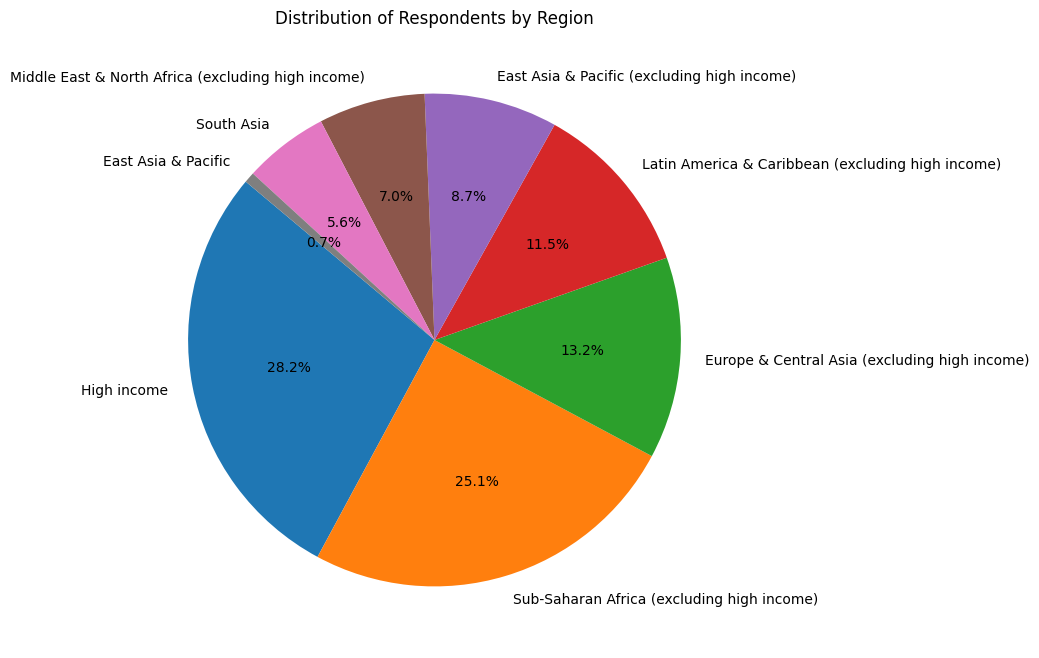

In [31]:
# Group by 'regionwb' and count the number of occurrences
region_counts = data['regionwb'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Respondents by Region')

# Show the plot
plt.show()

In [39]:
# Filter the dataset to only include "High income" region
high_income_countries = data[data['regionwb'] == 'High income']

# Get the unique list of countries in the "High income" category
high_income_country_list = high_income_countries['economy'].unique()

# Count respondents from each high-income country
high_income_country_counts = high_income_countries['economy'].value_counts()

# Display the counts
print(high_income_country_counts)

economy
Saudi Arabia            1019
Cyprus                  1019
Belgium                 1012
Korea, Rep.             1011
Japan                   1010
Lithuania               1009
Canada                  1007
United States           1007
Latvia                  1006
Sweden                  1006
Czechia                 1005
Slovak Republic         1005
Hong Kong SAR, China    1003
Hungary                 1003
Greece                  1003
Denmark                 1002
Portugal                1002
Norway                  1001
Estonia                 1001
Croatia                 1001
Poland                  1001
Switzerland             1000
Spain                   1000
Slovenia                1000
United Arab Emirates    1000
Singapore               1000
United Kingdom          1000
Australia               1000
New Zealand             1000
Netherlands             1000
Malta                   1000
Austria                 1000
Italy                   1000
Israel                  1000
Irelan